In [1]:
#!pip install missingno
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib.pyplot as plt
import missingno as msno 

In [2]:
Med_coll_issues = pd.read_excel('./data/Incosistencias en reclamacion.xlsx')

# MEDICINE COLLECTING ISSUES TREATMENTS (INCONSISTENCIAS EN RECLAMACIÓN)

Issues that prevent patients from receiving the medication (Omalizumab).

Inconsistencias en la reclamación: Considera los eventos/inconvenientes que impiden a los pacientes recibir el medicamento (Omalizumab).

In [3]:
print('Shape:', Med_coll_issues.shape)
print(Med_coll_issues.columns)
print(Med_coll_issues.info())
Med_coll_issues.head()

Shape: (7684, 6)
Index(['IDENTIFICACIÓN', 'TIPO NOVEDAD', 'TIPO EVENTO', 'NOVEDAD',
       'FE_REGISTRO', 'OBSERVACIONES'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDENTIFICACIÓN  7684 non-null   int64  
 1   TIPO NOVEDAD    7684 non-null   object 
 2   TIPO EVENTO     7684 non-null   object 
 3   NOVEDAD         0 non-null      float64
 4   FE_REGISTRO     7684 non-null   object 
 5   OBSERVACIONES   6967 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 360.3+ KB
None


,IDENTIFICACIÓN,TIPO NOVEDAD,TIPO EVENTO,NOVEDAD,FE_REGISTRO,OBSERVACIONES
0,1729172,INCONSISTENCIAS EN LA RECLAMACION,AUTORIZAN MX PARA OTRO PROVEEDOR,NaN,2012-07-03,"OMALIZUMAB XOLAIR, LAS 3 PRIMERAS APLICACIONES..."
1,852244,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES CON LA AUTORIZACION DEL MEDICAM...,NaN,2012-04-02,NaN
2,1001619,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES PERSONALES PARA RECLAMARLO,NaN,2012-07-06,OMALIZUMAB- PACIENTE QUE RELATA QUE NO PUDO AS...
3,852244,INCONSISTENCIAS EN LA RECLAMACION,DESCONOCIMIENTO DE TRAMITES,NaN,2012-11-15,salmeterol/fluticasona y montelukast\r\n
4,811451,INCONSISTENCIAS EN LA RECLAMACION,PACIENTE NO CONTACTADO,NaN,2012-12-11,se habla con la hija andrea quien brinda el nu...


In [4]:
Med_coll_issues.rename(columns={'IDENTIFICACIÓN':'id_paciente','TIPO NOVEDAD':'tipo_novedad','TIPO EVENTO':'tipo_evento',
                                'NOVEDAD':'novedad','FE_REGISTRO':'fecha_registro','OBSERVACIONES':'observaciones'}, inplace=True)

In [5]:
print('Patients:',len(Med_coll_issues['id_paciente'].unique()))

Patients: 729


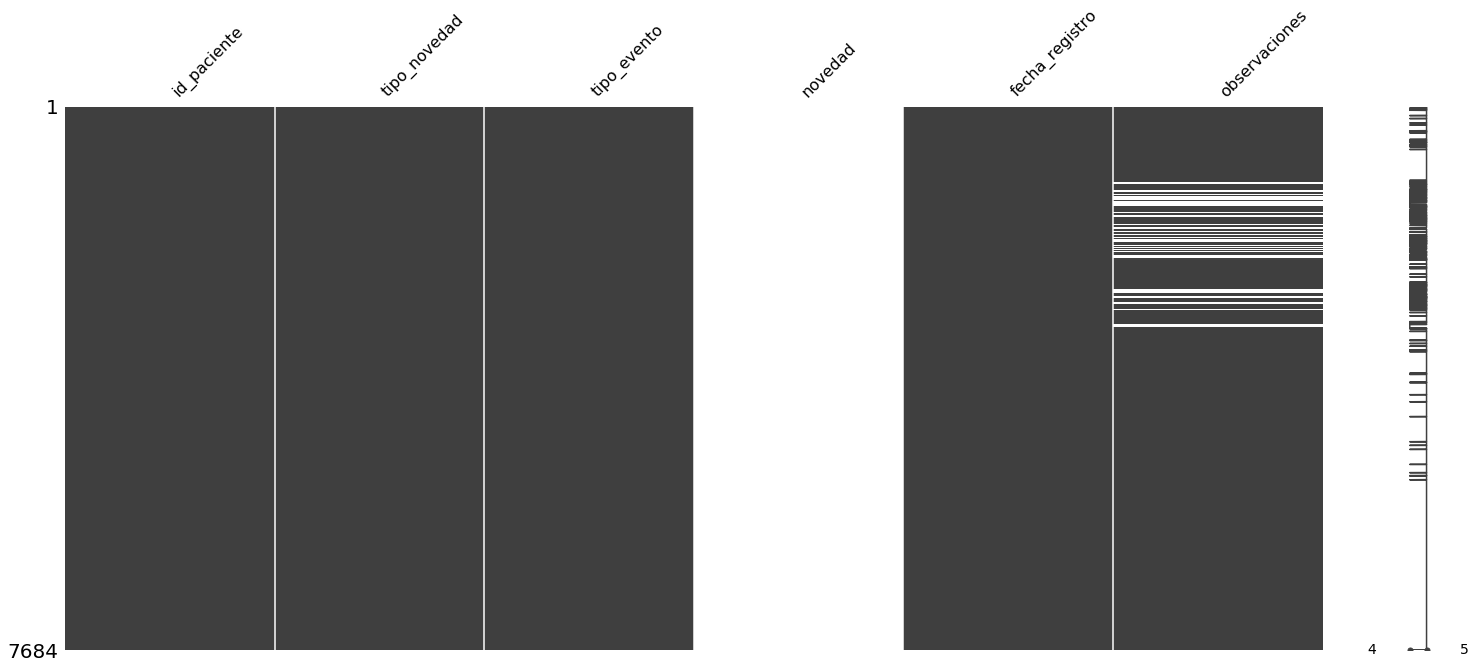

In [6]:
msno.matrix(Med_coll_issues) 

In [7]:
print(len(Med_coll_issues['tipo_novedad'].unique()))
Med_coll_issues['tipo_novedad'].unique()

2


array(['INCONSISTENCIAS EN LA RECLAMACION', 'NUEVO INCONSISTENTE'],
      dtype=object)

In [8]:
Med_coll_issues.columns

Index(['id_paciente', 'tipo_novedad', 'tipo_evento', 'novedad',
       'fecha_registro', 'observaciones'],
      dtype='object')

In [9]:
Med_coll_issues1= Med_coll_issues.drop('novedad', axis=1)
Med_coll_issues1=Med_coll_issues1.astype({'id_paciente': str})
Med_coll_issues1.columns

Index(['id_paciente', 'tipo_novedad', 'tipo_evento', 'fecha_registro',
       'observaciones'],
      dtype='object')

In [10]:
Med_coll_issues1['fecha_registro']=pd.to_datetime(Med_coll_issues1['fecha_registro'])

In [11]:
Med_coll_issues1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_paciente     7684 non-null   object        
 1   tipo_novedad    7684 non-null   object        
 2   tipo_evento     7684 non-null   object        
 3   fecha_registro  7684 non-null   datetime64[ns]
 4   observaciones   6967 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 300.3+ KB


In [12]:
Med_coll_issues1['tipo_evento'].value_counts()

CONFIRMACION DE CITA                                      2208
SE AGENDA CITA DE APLICACION                               913
PACIENTE NO CONTACTADO                                     860
PACIENTE NO INCONSISTENTE RECLAMO MEDICAMENTO              774
INCONVENIENTES PERSONALES PARA RECLAMARLO                  383
SIN MX POR FALTA DE OPORTUNIDAD DE CITA                    347
OLVIDO DEL PACIENTE                                        329
INCONVENIENTES CON LA AUTORIZACION DEL MEDICAMENTO         329
CAMBIO DE TRATAMIENTO                                      187
DESCONOCIMIENTO DE TRAMITES                                137
Paciente Reclama por Intervención Previa                   132
MEDICO LO SUSPENDE                                         115
OLVIDO DE PACIENTE                                         110
SE REMITE A CONSULTA DE SFT                                 98
PACIENTE YA RECLAMO MEDICAMENTO                             95
PACIENTE CON FACTOR DE RIESGO PARA RECIBIR EL MX       

In [13]:
Med_coll_issues1[Med_coll_issues1['id_paciente']=='1196034'].sort_values(by='fecha_registro', ascending=False)


,id_paciente,tipo_novedad,tipo_evento,fecha_registro,observaciones
7170,1196034,NUEVO INCONSISTENTE,SE REMITE A CONSULTA DE SFT,2019-05-02,29140 - OMALIZUMAB 150/1 MG/ML SOLUCION INYECT...
7061,1196034,NUEVO INCONSISTENTE,CONFIRMACION DE CITA,2019-04-09,29140 -29157 omalizumab - se realiza COMUNICA...
7069,1196034,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2019-04-08,29140 omalizumab 150 mg - se realiza COMUNICAC...
6976,1196034,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2019-03-19,29140 - 29157 omalizumab 150 mg - se REALIZA C...
6971,1196034,NUEVO INCONSISTENTE,SE REMITE A CONSULTA DE SFT,2019-03-15,29140 omalziumab 150 mg -sE CONTACTA LA ENCAR...
6945,1196034,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2019-03-14,29140 omalizumab 150 mg - se REALIZA COMUNICAC...
6936,1196034,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2019-03-11,29140 omalizumab 150 mg - se REALIZA COMUNICAC...
6870,1196034,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2019-02-18,OMALIZUMAB-XOLAIR ® SOLUCIÓN INYECTABLE 150MG ...
5384,1196034,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES CON LA AUTORIZACION DEL MEDICAM...,2018-07-27,OMALIZUMAB 150 MG POLV INY (XOLAIR)- PACIENTE ...
5229,1196034,INCONSISTENCIAS EN LA RECLAMACION,SIN MX POR FALTA DE OPORTUNIDAD DE CITA,2018-07-10,OMALIZUMAB 150 MG POLV INY (XOLAIR)- PACIENTE ...


In [14]:
Med_coll_issues1['año']=pd.to_datetime(Med_coll_issues1['fecha_registro'], infer_datetime_format=True).dt.strftime('%Y')
Med_coll_issues1

,id_paciente,tipo_novedad,tipo_evento,fecha_registro,observaciones,año
0,1729172,INCONSISTENCIAS EN LA RECLAMACION,AUTORIZAN MX PARA OTRO PROVEEDOR,2012-07-03,"OMALIZUMAB XOLAIR, LAS 3 PRIMERAS APLICACIONES...",2012
1,852244,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES CON LA AUTORIZACION DEL MEDICAM...,2012-04-02,NaN,2012
2,1001619,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES PERSONALES PARA RECLAMARLO,2012-07-06,OMALIZUMAB- PACIENTE QUE RELATA QUE NO PUDO AS...,2012
3,852244,INCONSISTENCIAS EN LA RECLAMACION,DESCONOCIMIENTO DE TRAMITES,2012-11-15,salmeterol/fluticasona y montelukast\r\n,2012
4,811451,INCONSISTENCIAS EN LA RECLAMACION,PACIENTE NO CONTACTADO,2012-12-11,se habla con la hija andrea quien brinda el nu...,2012
...,...,...,...,...,...,...
7679,1406735,INCONSISTENCIAS EN LA RECLAMACION,DESCONOCIMIENTO DE TRAMITES,2020-05-18,29631 - MEPOLIZUMAB - se agenda cita apra el d...,2020
7680,903409,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2020-05-18,OMALIZUMAB 150MG- OMALIZUMAB 75MG- OK CITA 202...,2020
7681,1745421,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2020-05-21,OMALIZUMAB- OK CITA 2020/05/28 01:30 PM. RG MV...,2020
7682,1676822,INCONSISTENCIAS EN LA RECLAMACION,HOSPITALIZADO,2020-05-29,NaN,2020


In [15]:
#Registros por año
med1 = Med_coll_issues1.groupby('año').agg({'id_paciente':'count'}).reset_index()
med1

,año,id_paciente
0,2012,13
1,2013,36
2,2014,83
3,2015,374
4,2016,1228
5,2017,1850
6,2018,2624
7,2019,1441
8,2020,35


In [16]:
med2= Med_coll_issues1.groupby(['id_paciente','año']).agg({'tipo_novedad':'count'}).reset_index()
me2=med2.groupby('año').agg({'id_paciente':'count'}).reset_index()

Text(0.5, 1.0, 'Records')

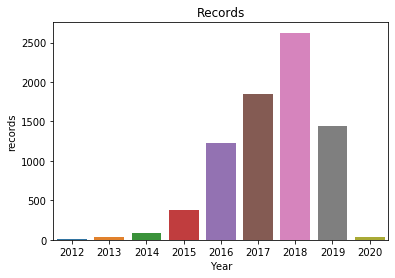

In [17]:

x1 = sns.barplot(x='año', y='id_paciente' , data=med1)
plt.xlabel('Year')
plt.ylabel('records')
plt.title('Records')

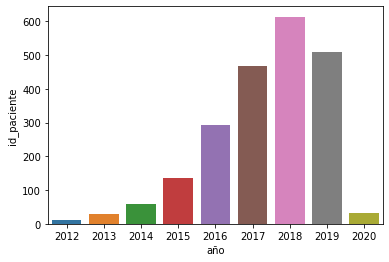

In [18]:
x2 = sns.barplot(x='año', y='id_paciente' , data=me2)

Text(0, 0.5, 'records')

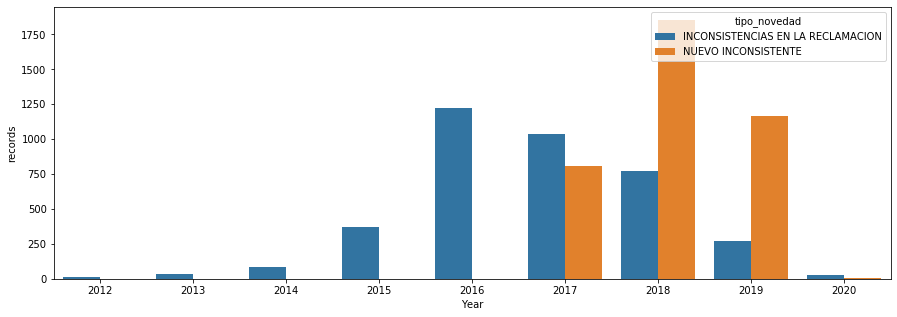

In [19]:
med3=Med_coll_issues1.groupby(['tipo_novedad','año']).agg({'id_paciente':'count'}).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='año', y='id_paciente', hue='tipo_novedad',data=med3)
plt.xlabel('Year')
plt.ylabel('records')

Text(0.5, 0, 'novelty_type')

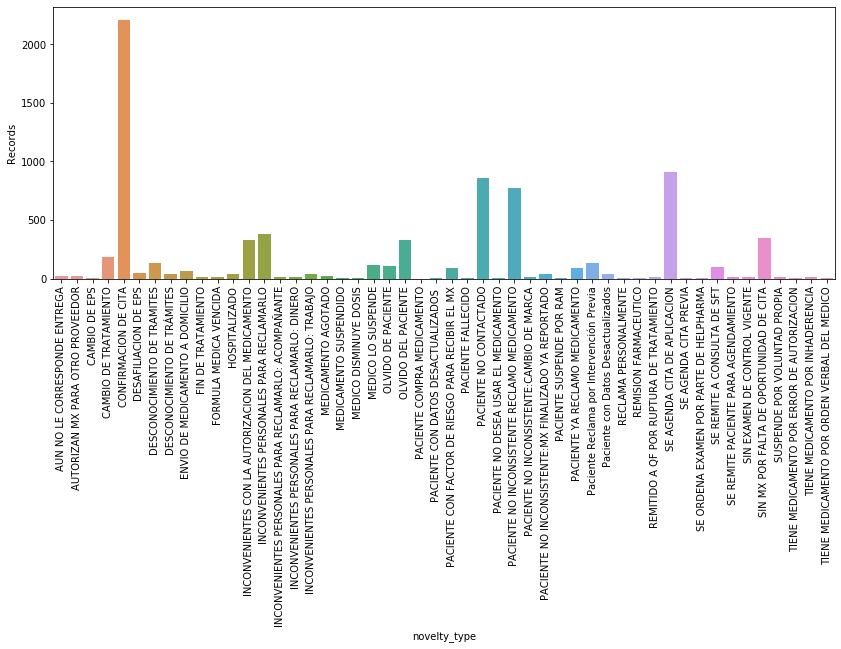

In [20]:
med4=Med_coll_issues1.groupby(['tipo_evento']).agg({'id_paciente':'count'}).reset_index()
med4.sort_values(by='id_paciente', ascending=False).reset_index()

plt.figure(figsize=(14,5))
sns.barplot(x='tipo_evento', y='id_paciente', data=med4)
plt.xticks(rotation='vertical')
plt.ylabel('Records')
plt.xlabel('novelty_type')

In [21]:
Med_coll_issues1.columns

Index(['id_paciente', 'tipo_novedad', 'tipo_evento', 'fecha_registro',
       'observaciones', 'año'],
      dtype='object')

In [22]:
Med_coll_issues1.rename(columns={'id_paciente':'id_patient', 'tipo_novedad':'novelty_type', 
                                 'tipo_evento':'event_type', 'fecha_registro':'register_date',
       'observaciones':'Observations', 'año':'year'}, inplace=True)

In [23]:
Med_coll_issues1
Med_coll_issues2 = Med_coll_issues1.drop(columns='year')

In [24]:
#Med_coll_issues2.to_csv('./data/cleansed/Med_coll_issues.csv', sep='|', index=False)

In [25]:
Med_coll_issues2[(Med_coll_issues2['register_date'] > '2017-12-31') & (Med_coll_issues2['register_date'] > '2018-02-10') ]

,id_patient,novelty_type,event_type,register_date,Observations
3908,1330142,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2018-02-12,21755 - OMALIZUMAB \t150 MG POLVO LIOFILIZADO ...
3916,880573,INCONSISTENCIAS EN LA RECLAMACION,PACIENTE NO INCONSISTENTE RECLAMO MEDICAMENTO,2018-02-12,PEMETREXED 500 MG POLVO LIOF. (ALIMTA)-21282\r...
3917,847022,INCONSISTENCIAS EN LA RECLAMACION,SIN MX POR FALTA DE OPORTUNIDAD DE CITA,2018-02-12,OMALIZUMAB 150 MG POLV INY (XOLAIR)-SE REALIZA...
3918,1772651,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES CON LA AUTORIZACION DEL MEDICAM...,2018-02-12,omalizumab \r\n se establece comunciacion con ...
3919,1772651,INCONSISTENCIAS EN LA RECLAMACION,SIN MX POR FALTA DE OPORTUNIDAD DE CITA,2018-02-12,omalizumab \r\n se establece COMUNICACION CON ...
...,...,...,...,...,...
7679,1406735,INCONSISTENCIAS EN LA RECLAMACION,DESCONOCIMIENTO DE TRAMITES,2020-05-18,29631 - MEPOLIZUMAB - se agenda cita apra el d...
7680,903409,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2020-05-18,OMALIZUMAB 150MG- OMALIZUMAB 75MG- OK CITA 202...
7681,1745421,NUEVO INCONSISTENTE,SE AGENDA CITA DE APLICACION,2020-05-21,OMALIZUMAB- OK CITA 2020/05/28 01:30 PM. RG MV...
7682,1676822,INCONSISTENCIAS EN LA RECLAMACION,HOSPITALIZADO,2020-05-29,NaN


In [26]:
Med_coll_issues2['year'] = Med_coll_issues2['register_date'].dt.year
Med_coll_issues2['month'] = Med_coll_issues2['register_date'].dt.month

In [27]:
med_df = Med_coll_issues2[Med_coll_issues2['year'] > 2012]


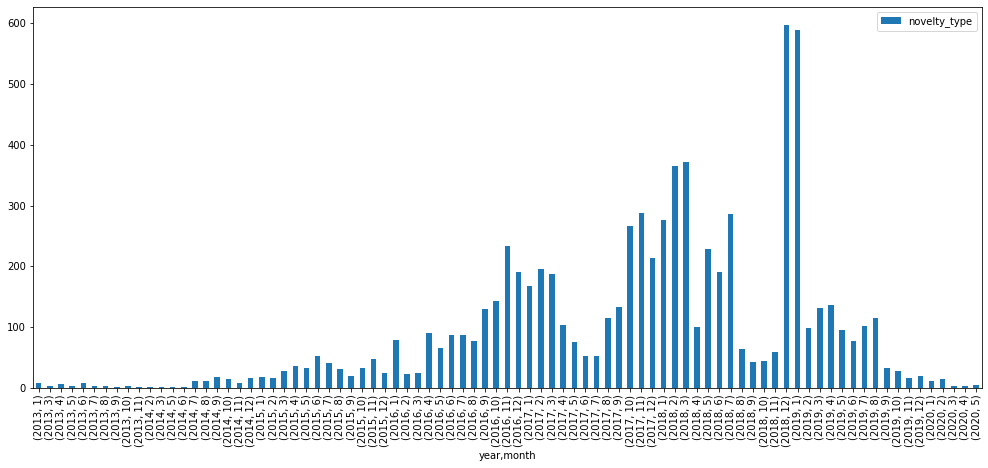

In [28]:
med_df.groupby(['year','month']).agg({'novelty_type':'count'}).plot(kind='bar',figsize=(17,7))

Text(0.5, 1, 'Collecting Issues')

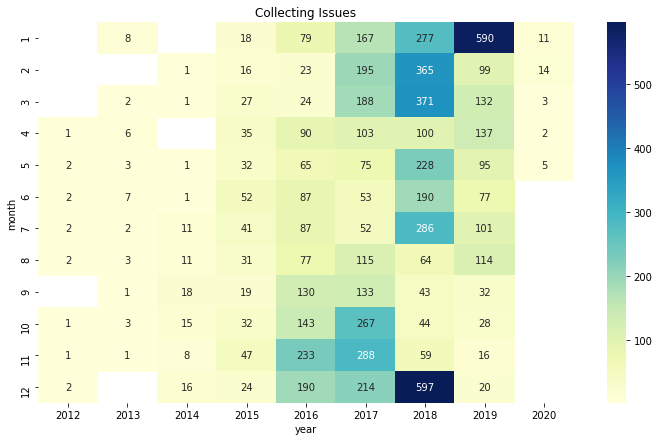

In [29]:
coll_pivot = pd.pivot_table(Med_coll_issues2, values='novelty_type', index='month', columns='year', aggfunc='count')
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(coll_pivot, ax=ax, annot=True, fmt=".0f", cmap="YlGnBu")
ax.set_title('Collecting Issues')

In [30]:
med2018= Med_coll_issues2[Med_coll_issues2['year'] == 2018] 

In [32]:
med20= med2018[med2018['month'] == 1] 

med20.novelty_type.value_counts()

NUEVO INCONSISTENTE                  238
INCONSISTENCIAS EN LA RECLAMACION     39
Name: novelty_type, dtype: int64